In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime

In [81]:
def parser(x):
    return datetime.datetime.strptime('19'+x, '%Y-%m')

series =pd.read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv',sep=';', header=0, parse_dates=[0],index_col=0, squeeze=True,date_parser=parser)
series=pd.DataFrame(series,columns=['Sales'])

In [82]:
series.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [83]:
series.dtypes

Sales    float64
dtype: object

In [84]:
series.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,36.0,312.6,148.937164,119.3,192.45,280.15,411.1,682.0


In [85]:
series.isnull().sum()

Sales    0
dtype: int64

(array([693961., 694081., 694204., 694326., 694446., 694569., 694691.,
        694811., 694934., 695056.]),
 <a list of 10 Text major ticklabel objects>)

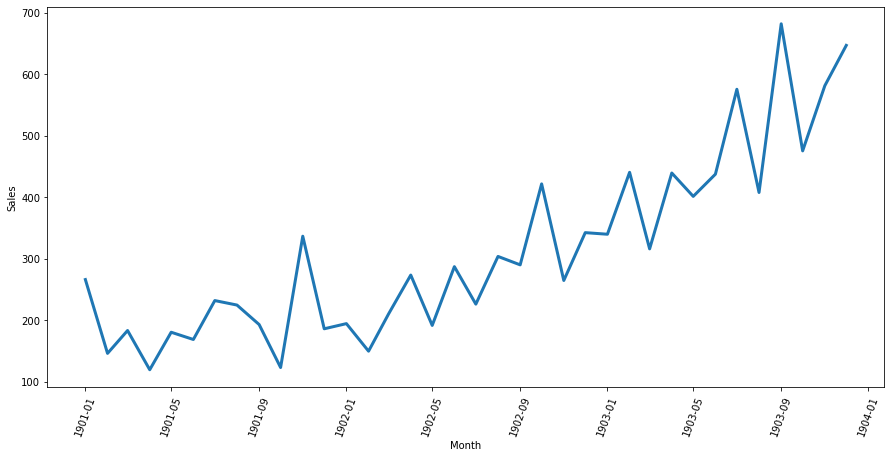

In [86]:
import seaborn as sns
fig=plt.figure(figsize=(15,7))
sns.lineplot(x=series.index , y=series.Sales,linewidth=3)
plt.xticks(rotation=70)

In [87]:
from statsmodels.tsa.stattools import adfuller , kpss
results=adfuller(series.Sales, regression='ctt')
print("ADF Test")
print(f"Test Statistic = {results[0]}")
print(f"P-Value = {results[1]}")

result=kpss(series.Sales,regression='ct')
print("\nKPSS Test")
print(f"Test Statistic = {results[0]}")
print(f"P-Value = {results[1]}")

ADF Test
Test Statistic = -4.244858733944584
P-Value = 0.015095224576492592

KPSS Test
Test Statistic = -4.244858733944584
P-Value = 0.015095224576492592


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


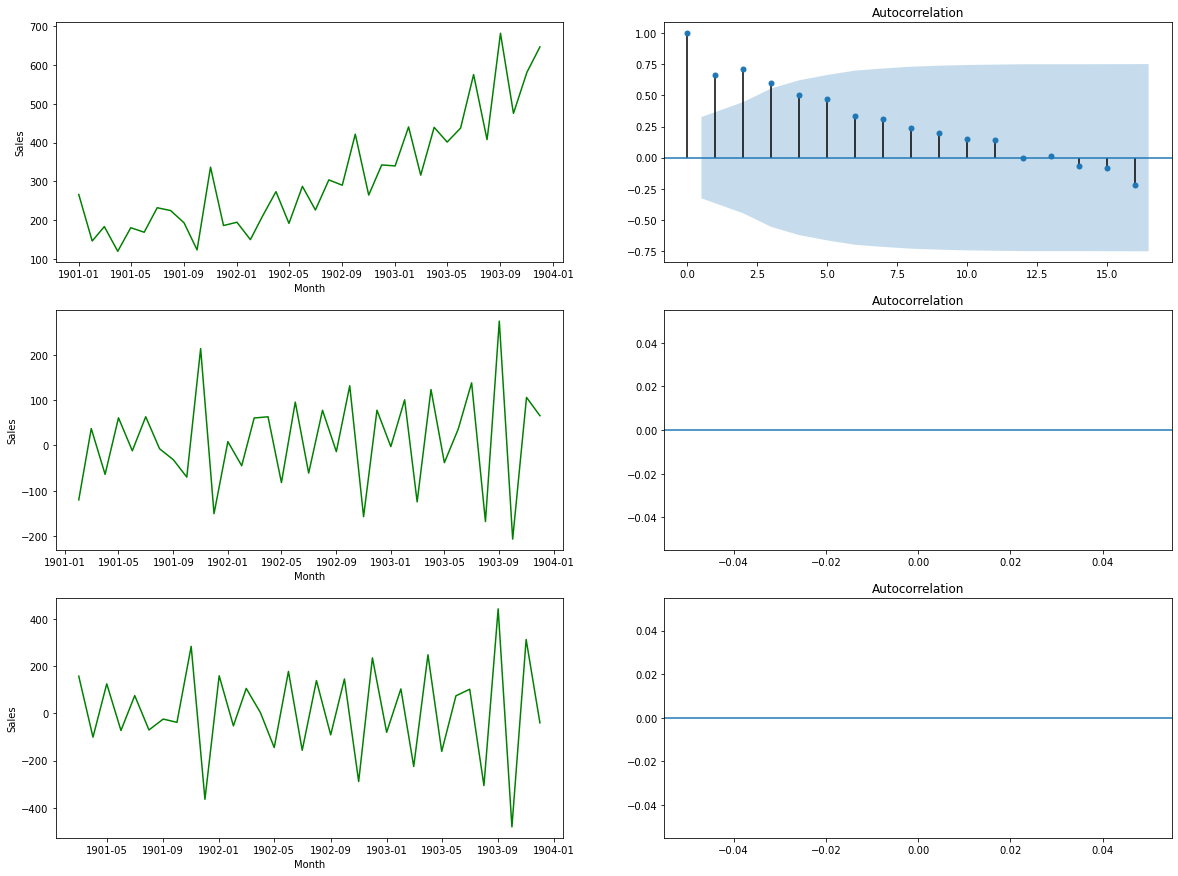

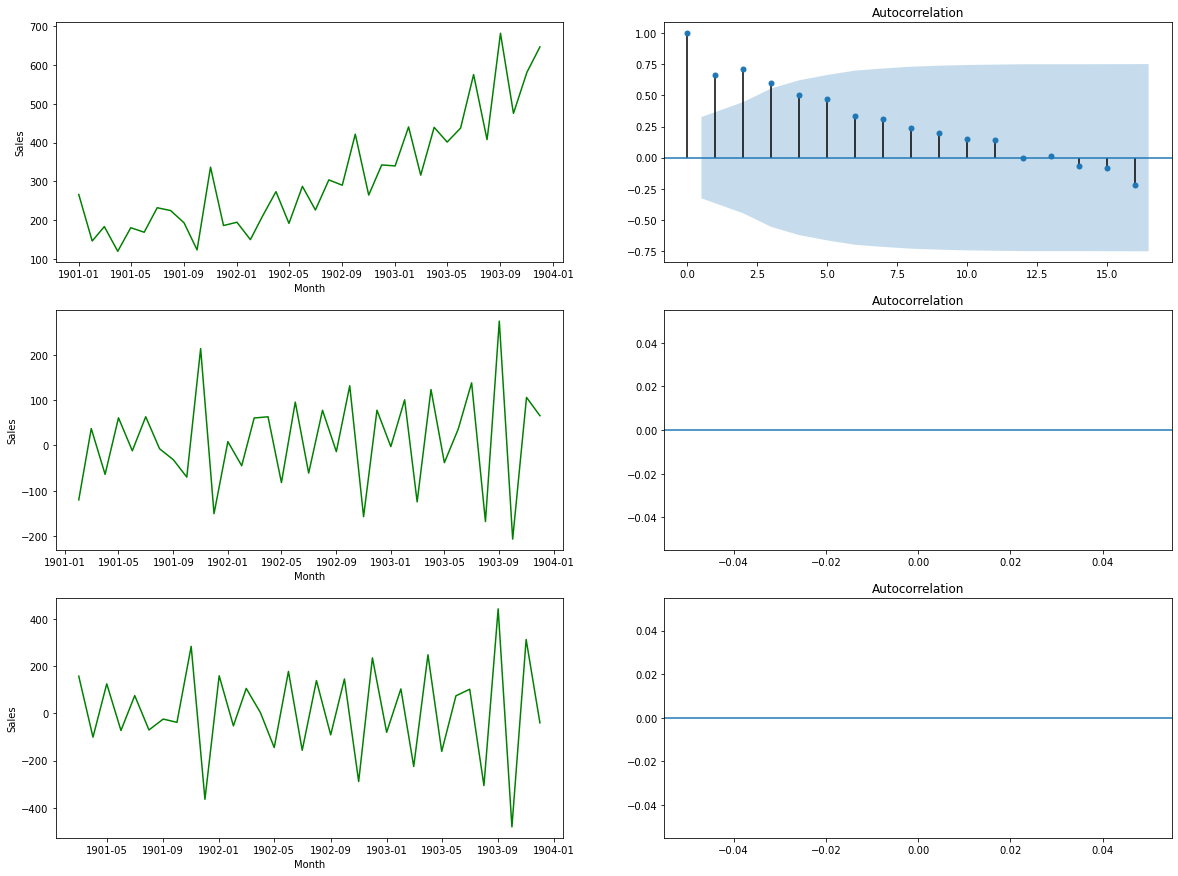

In [88]:
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf
import seaborn as sns
fig,ax=plt.subplots(3,2,figsize=(20,15))

sns.lineplot(x=series.index,y=series.Sales,ax=ax[0,0],color='g')
plot_acf(series.Sales,ax=ax[0,1])

sns.lineplot(x=series.index,y=series.Sales.diff(),ax=ax[1,0],color='g')
plot_acf(series.Sales.diff(),ax=ax[1,1])

sns.lineplot(x=series.index,y=series.Sales.diff().diff(),ax=ax[2,0],color='g')
plot_acf(series.diff().diff(),ax=ax[2,1])

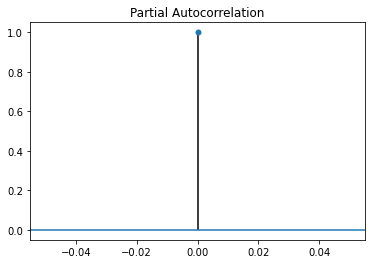

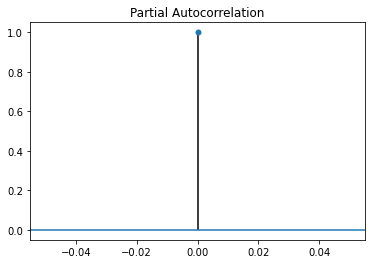

In [89]:
plot_pacf(series.Sales.diff())

In [90]:
model_1=ARIMA(series.Sales , order=(1,1,0))
model_1=model_1.fit()
model_1.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -200.011
Method:                       css-mle   S.D. of innovations             72.566
Date:                Mon, 20 Sep 2021   AIC                            406.022
Time:                        23:12:30   BIC                            410.688
Sample:                    02-01-1901   HQIC                           407.633
                         - 12-01-1903                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.8300      7.152      1.654      0.098      -2.187      25.847
ar.L1.D.Sales    -0.7364      0.111     -6.605      0.000      -0.955      -0.518
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3579           +0.0000j            1.3579            0.5000
-----------------------------------------------------------------------------
"""

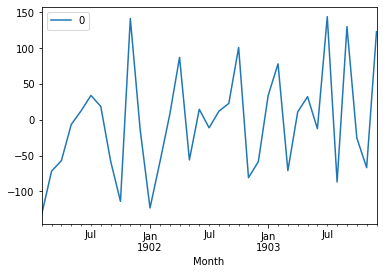

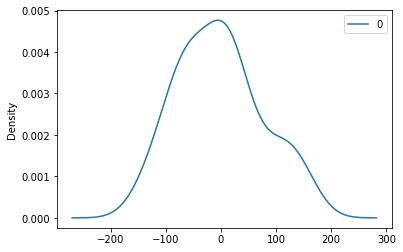

In [91]:
residuals=pd.DataFrame(model_1.resid)
residuals.plot()
residuals.plot(kind='kde')

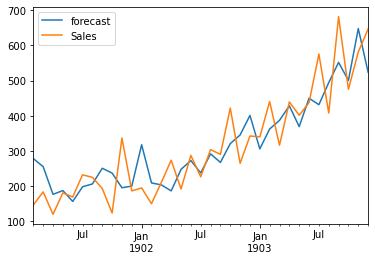

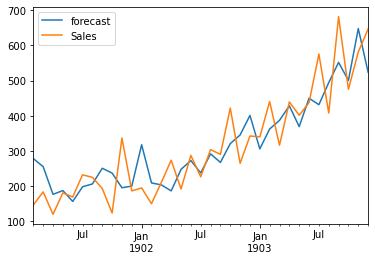

In [101]:
model_1.plot_predict(dynamic=False)

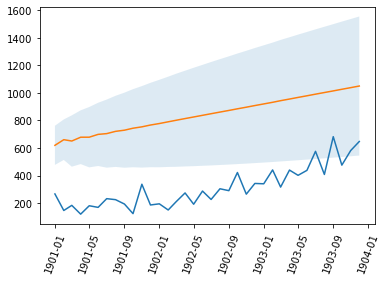

In [144]:
prediction,std_err,conf_int=model_1.forecast(36,alpha=0.05)
prediction=pd.Series(prediction,index=series.index)
conf_int=pd.DataFrame(conf_int,columns=['lower_series','upper_series'])

plt.plot(series.Sales)
plt.plot(prediction)
plt.xticks(rotation=70)
plt.fill_between(series.index,conf_int.lower_series,conf_int.upper_series,alpha=0.15)